## Import libraries

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string 
from google.colab import files


## Load data

In [ ]:
!git clone https://github.com/quanho114/amazon-feedback-ai-agent.git

Cloning into 'amazon-feedback-ai-agent'...
remote: Enumerating objects: 71, done.
remote: Total 71 (delta 0), reused 0 (delta 0), pack-reused 71 (from 1)
Receiving objects: 100% (71/71), 37.51 MiB | 33.22 MiB/s, done.
Resolving deltas: 100% (19/19), done.


In [19]:
%cd amazon-feedback-ai-agent

/content/amazon-feedback-ai-agent


In [20]:
df = pd.read_csv("data/processed/reviews_clean.csv")
df.head()

,Review Count,Review Date,Rating,Review Title,Review Text,clean_review,review_length,num_exclamations,num_questions,has_uppercase,day_of_week
0,1 review,2024-09-16 13:44:26+00:00,1,A Store That Doesn't Want to Sell Anything,"I registered on the website, tried to order a ...","i registered on the website, tried to order a ...",106,0,0,False,Monday
1,9 reviews,2024-09-16 18:26:46+00:00,1,Had multiple orders one turned up and…,Had multiple orders one turned up and driver h...,had multiple orders one turned up and driver h...,53,0,0,False,Monday
2,90 reviews,2024-09-16 21:47:39+00:00,1,I informed these reprobates,I informed these reprobates that I WOULD NOT B...,i informed these reprobates that i would not b...,122,3,0,False,Monday
3,5 reviews,2024-09-17 07:15:49+00:00,1,Advertise one price then increase it on website,I have bought from Amazon before and no proble...,i have bought from amazon before and no proble...,82,0,0,False,Tuesday
4,8 reviews,2024-09-16 18:37:17+00:00,1,If I could give a lower rate I would,If I could give a lower rate I would! I cancel...,if i could give a lower rate i would! i cancel...,100,5,0,False,Monday


In [21]:
# Select columns 
columns = ['Rating', 'clean_review', 'day_of_week']
df = df[columns].copy()
df.head()

,Rating,clean_review,day_of_week
0,1,"i registered on the website, tried to order a ...",Monday
1,1,had multiple orders one turned up and driver h...,Monday
2,1,i informed these reprobates that i would not b...,Monday
3,1,i have bought from amazon before and no proble...,Tuesday
4,1,if i could give a lower rate i would! i cancel...,Monday


## Map Rating to Sentiment

In [23]:
def map_sentiment(r):
    if r <= 2:
        return 'negative'
    elif r == 3:
        return 'neutral'
    else:
        return 'positive'
    
df['sentiment'] = df['Rating'].apply(map_sentiment)
df.head()

,Rating,clean_review,day_of_week,sentiment
0,1,"i registered on the website, tried to order a ...",Monday,negative
1,1,had multiple orders one turned up and driver h...,Monday,negative
2,1,i informed these reprobates that i would not b...,Monday,negative
3,1,i have bought from amazon before and no proble...,Tuesday,negative
4,1,if i could give a lower rate i would! i cancel...,Monday,negative


## EDA

/tmp/ipython-input-1091304729.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='sentiment', order=['negative','neutral','positive'],


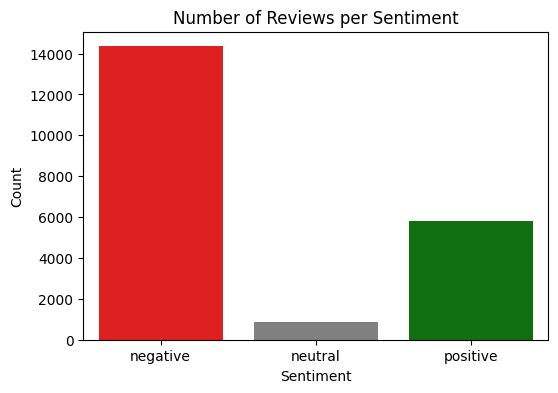

In [26]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='sentiment', order=['negative','neutral','positive'],
              palette=['red','gray','green'])
plt.title("Number of Reviews per Sentiment")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

In [29]:
print("Sample negative review:\n")
print(df[df['sentiment']=='negative'].sample(1)['clean_review'].iloc[0])

print("\nSample positive review:\n")
print(df[df['sentiment']=='positive'].sample(1)['clean_review'].iloc[0])

Sample negative review:

not very good as i expectjust sosoquality is poor

Sample positive review:

use them all the time  super service and no quibs guarantees on everything  thats what i find.


In [ ]:
df['review_len'] = df['clean_review'].apply(lambda x: len(str(x).split()))

review_len_clipped = df['review_len'].clip(upper=300)

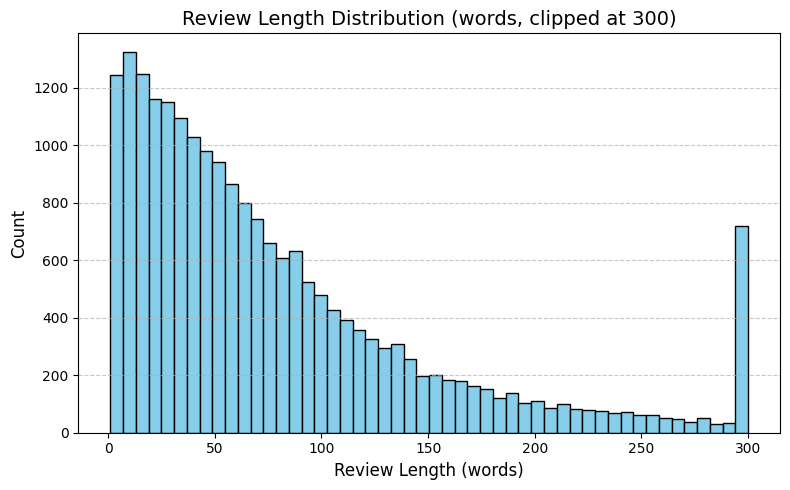

In [34]:
# Clip review length at 300 words
review_len_clipped = df['review_len'].clip(upper=300)

# Create histogram using matplotlib
plt.figure(figsize=(8, 5))
plt.hist(
    review_len_clipped,
    bins=50,
    color='skyblue',           # fill color
    edgecolor='black',         # border color
    linewidth=1
)

# Add titles and labels
plt.title("Review Length Distribution (words, clipped at 300)", fontsize=14)
plt.xlabel("Review Length (words)", fontsize=12)
plt.ylabel("Count", fontsize=12)

# Grid and layout
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()